# Tutorial about computing hulls for LocData

For each set of localizations with 2D or 3D spatial coordinates various hull can be computed. A hull can be the minimal bounding box, the oriented minimal bounding box, the convex hull, or an alpha shape. 

You can trigger computation of specific hull objects using a specific hull class or from the corresponding LocData attribute.

In [1]:
from pathlib import Path

%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import surepy as sp
from surepy.data.hulls import BoundingBox, ConvexHull, OrientedBoundingBox

In [2]:
sp.show_versions(system=False, dependencies=False, verbose=False)


Surepy:
   version: 0.7.dev3+gb9aca40

Python:
   version: 3.8.8


## Some localization data

In [3]:
locdata = sp.simulate_Thomas(n_samples=30, n_features=2, centers=3, feature_range=(0, 100), cluster_std=2, seed=0)

locdata.print_summary()

identifier: "1"
comment: ""
creation_date: "2021-03-04 13:47:16 +0100"
modification_date: ""
source: SIMULATION
state: RAW
element_count: 30
frame_count: 0
file_type: UNKNOWN_FILE_TYPE
file_path: ""



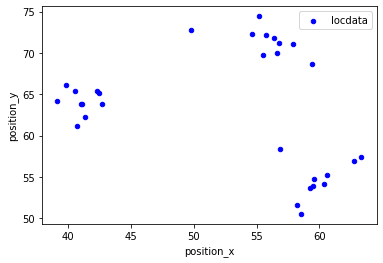

In [4]:
fig, ax = plt.subplots(nrows=1, ncols=1)
locdata.data.plot.scatter(x='position_x', y='position_y', ax=ax, color='Blue', label='locdata')
plt.show()

### Minimal bounding box for spatial coordinates

In [5]:
# H = BoundingBox(locdata.coordinates)

H = locdata.bounding_box

print('dimension: ', H.dimension)
print('hull: ', H.hull)
print('width: ', H.width)
print('vertices: ', H.vertices)
print('region_measure: ', H.region_measure)
print('subregion_measure: ', H.subregion_measure)

dimension:  2
hull:  [[39.13768424 50.52672536]
 [63.34189604 74.42748365]]
width:  [24.2042118  23.90075829]
vertices:  [[39.13768424 63.34189604]
 [50.52672536 74.42748365]]
region_measure:  578.4990157124165
subregion_measure:  96.2099401700656


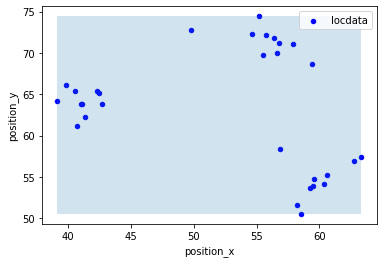

In [6]:
fig, ax = plt.subplots(nrows=1, ncols=1)
ax.add_patch(locdata.bounding_box.region.as_artist(alpha=0.2))
locdata.data.plot.scatter(x='position_x', y='position_y', ax=ax, color='Blue', label='locdata')
plt.show()

### Oriented minimal bounding box for spatial coordinates

In [7]:
# H = OrientedBoundingBox(locdata.coordinates)

H = locdata.oriented_bounding_box

print('dimension: ', H.dimension)
print('hull: ', H.hull)
print('vertices: ', H.vertices)
print('width: ', H.width)
print('region_measure: ', H.region_measure)
print('subregion_measure: ', H.subregion_measure)

dimension:  2
hull:  POLYGON ((51.20301750899331 45.60896482535035, 67.6048766698954 56.66174563741688, 54.54581045268547 76.04084746794747, 38.14395129178337 64.98806665588094, 51.20301750899331 45.60896482535035))
vertices:  [[51.20301751 45.60896483]
 [67.60487667 56.66174564]
 [54.54581045 76.04084747]
 [38.14395129 64.98806666]
 [51.20301751 45.60896483]]
width:  [19.77839598 23.36854292]
region_measure:  462.1922953982271
subregion_measure:  86.29387780448057


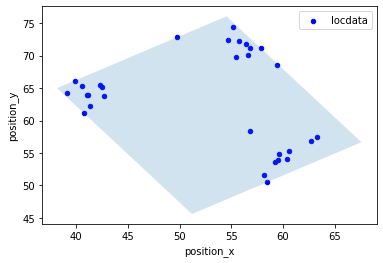

In [8]:
fig, ax = plt.subplots(nrows=1, ncols=1)
ax.add_patch(locdata.oriented_bounding_box.region.as_artist(alpha=0.2))
locdata.data.plot.scatter(x='position_x', y='position_y', ax=ax, color='Blue', label='locdata')
plt.show()

### Convex hull for spatial coordinates (scipy)

In [9]:
# H = ConvexHull(locdata.coordinates, method='scipy')

H = locdata.convex_hull

print('dimension: ', H.dimension)
print('hull: ', H.hull)
print('vertex_indices: ', H.vertex_indices)
print('vertices: ', H.vertices)
print('region_measure: ', H.region_measure)
print('subregion_measure: ', H.subregion_measure)
print('points on boundary: ', H.points_on_boundary)
print('points on boundary relative to all points: ', H.points_on_boundary_rel)

dimension:  2
hull:  <scipy.spatial.qhull.ConvexHull object at 0x000002CAC3C2FD90>
vertex_indices:  [ 6 20 24  5 17  0 28 10 18]
vertices:  [[58.50076611 50.52672536]
 [63.34189604 57.42703584]
 [59.42085964 68.61020529]
 [57.86950854 71.10862011]
 [55.16943754 74.42748365]
 [49.77537076 72.82617383]
 [39.85988921 66.14439202]
 [39.13768424 64.16393075]
 [40.73918737 61.1368461 ]]
region_measure:  331.8318755540807
subregion_measure:  71.30458738022182
points on boundary:  9
points on boundary relative to all points:  0.3


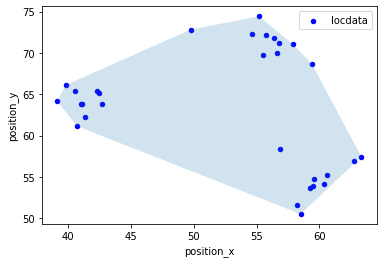

In [10]:
fig, ax = plt.subplots(nrows=1, ncols=1)
ax.add_patch(locdata.convex_hull.region.as_artist(alpha=0.2))
locdata.data.plot.scatter(x='position_x', y='position_y', ax=ax, color='Blue', label='locdata')
plt.show()

### Convex hull for spatial coordinates (shapely)

Some hulls can be computed from different algorithms. If implemented, use the `methods` parameter to specify the algorithm.

In [11]:
H = ConvexHull(locdata.coordinates, method='shapely')

print('dimension: ', H.dimension)
print('hull: ', H.hull)
print('vertices: ', H.vertices)
print('region_measure: ', H.region_measure)
print('subregion_measure: ', H.subregion_measure)
print('points on boundary: ', H.points_on_boundary)
print('points on boundary relative to all points: ', H.points_on_boundary_rel)

dimension:  2
hull:  POLYGON ((58.50076611190416 50.52672536324184, 40.73918736980156 61.13684610200226, 39.13768423877457 64.16393074623767, 39.85988921379062 66.14439201832943, 49.77537076106432 72.82617382812268, 55.16943753505423 74.4274836511679, 57.86950853904769 71.10862010971034, 59.42085964070769 68.61020528804443, 63.3418960358813 57.42703583949026, 58.50076611190416 50.52672536324184))
vertices:  [[58.50076611 50.52672536]
 [40.73918737 61.1368461 ]
 [39.13768424 64.16393075]
 [39.85988921 66.14439202]
 [49.77537076 72.82617383]
 [55.16943754 74.42748365]
 [57.86950854 71.10862011]
 [59.42085964 68.61020529]
 [63.34189604 57.42703584]]
region_measure:  331.83187555408074
subregion_measure:  71.30458738022182
points on boundary:  9
points on boundary relative to all points:  0.3


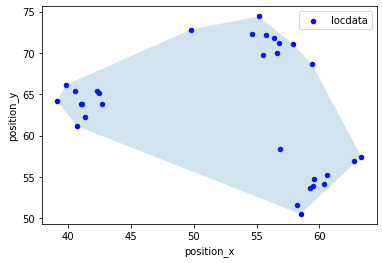

In [12]:
fig, ax = plt.subplots(nrows=1, ncols=1)
ax.add_patch(H.region.as_artist(alpha=0.2))
locdata.data.plot.scatter(x='position_x', y='position_y', ax=ax, color='Blue', label='locdata')
plt.show()

### Alpha shape for spatial coordinates

The alpha shape depends on a single parameter `alpha` (not to confuse with the alpha to specify opacity in figures). The alpha complex is an alpha-independent representation of all alpha shapes.

You can get all apha values for which the corresponding alpha shape changes.

In [13]:
sp.AlphaComplex(locdata.coordinates).alphas()

array([ 0.03827137,  0.15750784,  0.18274958,  0.3320945 ,  0.38150146,
        0.40345639,  0.44812417,  0.46034217,  0.52248578,  0.52937959,
        0.54664466,  0.54960805,  0.5524637 ,  0.55514724,  0.56261506,
        0.575794  ,  0.58336837,  0.59698423,  0.60944816,  0.61603479,
        0.62381451,  0.63598401,  0.71293257,  0.7790557 ,  0.79382747,
        0.80260178,  0.81268647,  0.82716513,  0.82754239,  0.82822763,
        0.8368412 ,  0.85211656,  0.86073662,  0.86827329,  0.93579644,
        0.94849187,  0.95281604,  0.96627334,  0.98660863,  0.99659525,
        1.00331746,  1.00727154,  1.0199998 ,  1.03709795,  1.03919126,
        1.03936113,  1.05318913,  1.05401694,  1.05495968,  1.06021923,
        1.07256525,  1.0736879 ,  1.10251149,  1.11505917,  1.12010149,
        1.16001481,  1.16513931,  1.19494987,  1.21002595,  1.27341626,
        1.33144509,  1.33233597,  1.35487908,  1.46752454,  1.46850282,
        1.47043929,  1.56180562,  1.57548394,  1.58838808,  1.59

You can determine an optimal `alpha`, i.e. the smallest `alpha` for which all points are still part of the alpha shape.

In [14]:
opt_alpha = sp.AlphaComplex(locdata.coordinates).optimal_alpha()
opt_alpha

10.344664584980329

In [15]:
# H = sp.AlphaShape(opt_alpha, locdata.coordinates)

locdata.update_alpha_shape(alpha=opt_alpha)
H = locdata.alpha_shape

print('dimension: ', H.dimension)
print('hull: ', H.hull)
print('vertex_indices: ', H.vertex_indices)
print('vertices: ', H.vertices)
print('region_measure: ', H.region_measure)
print('subregion_measure: ', H.subregion_measure)
print('points in alpha shape: ', H.n_points_alpha_shape)
print('points in alpha shape relative to all points: ', H.n_points_alpha_shape_rel)
print('points on boundary: ', H.n_points_on_boundary)
print('points on boundary relative to all points: ', H.n_points_on_boundary_rel)

dimension:  2
hull:  POLYGON ((63.3418960358813 57.42703583949026, 58.50076611190416 50.52672536324184, 40.73918736980156 61.13684610200226, 39.13768423877457 64.16393074623767, 39.85988921379062 66.14439201832943, 49.77537076106432 72.82617382812268, 55.16943753505423 74.4274836511679, 57.86950853904769 71.10862010971034, 59.42085964070769 68.61020528804443, 63.3418960358813 57.42703583949026))
vertex_indices:  [0, 5, 6, 10, 13, 17, 18, 20, 21, 24, 26, 27, 28]
vertices:  [[49.77537076 72.82617383]
 [57.86950854 71.10862011]
 [58.50076611 50.52672536]
 [39.13768424 64.16393075]
 [62.73691897 56.893078  ]
 [55.16943754 74.42748365]
 [40.73918737 61.1368461 ]
 [63.34189604 57.42703584]
 [60.36785464 54.1139506 ]
 [59.42085964 68.61020529]
 [56.86379723 58.38986909]
 [58.17923168 51.64828243]
 [39.85988921 66.14439202]]
region_measure:  331.83187555408074
subregion_measure:  71.30458738022183
points in alpha shape:  30
points in alpha shape relative to all points:  1.0
points on boundary:

The alpha shape is made of different vertex types that can be differentiated as *exterior*, *interior*, *regular* or *singular*.

In [16]:
ac_simplices_all = H.alpha_complex.get_alpha_complex_lines(H.alpha, type='all')
ac_simplices_exterior = H.alpha_complex.get_alpha_complex_lines(H.alpha, type='exterior')
ac_simplices_interior = H.alpha_complex.get_alpha_complex_lines(H.alpha, type='interior')
ac_simplices_regular = H.alpha_complex.get_alpha_complex_lines(H.alpha, type='regular')
ac_simplices_singular = H.alpha_complex.get_alpha_complex_lines(H.alpha, type='singular')

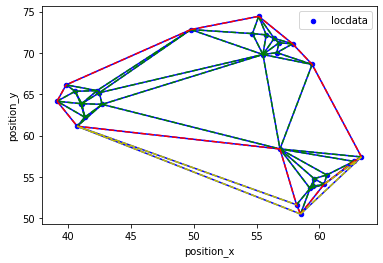

In [17]:
fig, ax = plt.subplots(nrows=1, ncols=1)

for simp in ac_simplices_all:
    ax.plot(locdata.coordinates[simp, 0], locdata.coordinates[simp, 1], '-b')
for simp in ac_simplices_interior:
    ax.plot(locdata.coordinates[simp, 0], locdata.coordinates[simp, 1], '--g')
for simp in ac_simplices_regular:
    ax.plot(locdata.coordinates[simp, 0], locdata.coordinates[simp, 1], '--r')
for simp in ac_simplices_singular:
    ax.plot(locdata.coordinates[simp, 0], locdata.coordinates[simp, 1], '--y')

locdata.data.plot.scatter(x='position_x', y='position_y', ax=ax, color='Blue', label='locdata')
plt.show()

Often the *regular* representation is good enough.

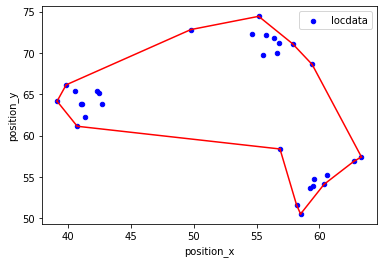

In [18]:
fig, ax = plt.subplots(nrows=1, ncols=1)
for simp in ac_simplices_regular:
    ax.plot(locdata.coordinates[simp, 0], locdata.coordinates[simp, 1], '-r')
locdata.data.plot.scatter(x='position_x', y='position_y', ax=ax, color='Blue', label='locdata')
plt.show()

You can get the connected components as `RoiRegion`.

In [19]:
H.connected_components

[{'region_type': 'shapelyPolygon', 'region_specs': [[[63.3418960358813, 57.42703583949026], [58.50076611190416, 50.52672536324184], [40.73918736980156, 61.13684610200226], [39.13768423877457, 64.16393074623767], [39.859889213790616, 66.14439201832943], [49.775370761064316, 72.82617382812268], [55.16943753505423, 74.4274836511679], [57.869508539047686, 71.10862010971034], [59.42085964070769, 68.61020528804443], [63.3418960358813, 57.42703583949026]], []]}]

In [20]:
connected_component_0 = H.connected_components[0]

print('dimension: ', connected_component_0.dimension)
print('region_measure: ', connected_component_0.region_measure)
print('subregion_measure: ', connected_component_0.subregion_measure)

dimension:  2
region_measure:  331.83187555408074
subregion_measure:  71.30458738022183


The alpha shape for a smaller alpha has multiple connected components.

In [21]:
H = sp.AlphaShape(5, locdata.coordinates)

print('dimension: ', H.dimension)
print('hull: ', H.hull)
print('vertex_indices: ', H.vertex_indices)
print('vertices: ', H.vertices)
print('region_measure: ', H.region_measure)
print('subregion_measure: ', H.subregion_measure)
print('points in alpha shape: ', H.n_points_alpha_shape)
print('points in alpha shape relative to all points: ', H.n_points_alpha_shape_rel)
print('points on boundary: ', H.n_points_on_boundary)
print('points on boundary relative to all points: ', H.n_points_on_boundary_rel)

dimension:  2
hull:  MULTIPOLYGON (((56.86379722591436 58.38986909015327, 63.3418960358813 57.42703583949026, 58.50076611190416 50.52672536324184, 58.1792316770302 51.64828242533174, 56.86379722591436 58.38986909015327)), ((57.86950853904769 71.10862010971034, 59.42085964070769 68.61020528804443, 55.50748579603427 69.8107451586385, 49.77537076106432 72.82617382812268, 55.16943753505423 74.4274836511679, 57.86950853904769 71.10862010971034)), ((40.73918736980156 61.13684610200226, 39.13768423877457 64.16393074623767, 39.85988921379062 66.14439201832943, 42.30911547721316 65.44607504772645, 42.49851437865681 65.19435510214517, 42.72033221839798 63.78584943424909, 40.73918736980156 61.13684610200226)))
vertex_indices:  [0, 1, 3, 5, 6, 10, 11, 12, 13, 14, 17, 18, 20, 21, 24, 26, 27, 28]
vertices:  [[49.77537076 72.82617383]
 [42.30911548 65.44607505]
 [41.34386966 62.22814694]
 [57.86950854 71.10862011]
 [58.50076611 50.52672536]
 [39.13768424 64.16393075]
 [42.72033222 63.78584943]
 [42.4

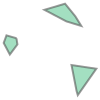

In [22]:
H.hull

In [23]:
ac_simplices_all = H.alpha_complex.get_alpha_complex_lines(H.alpha, type='all')
ac_simplices_exterior = H.alpha_complex.get_alpha_complex_lines(H.alpha, type='exterior')
ac_simplices_interior = H.alpha_complex.get_alpha_complex_lines(H.alpha, type='interior')
ac_simplices_regular = H.alpha_complex.get_alpha_complex_lines(H.alpha, type='regular')
ac_simplices_singular = H.alpha_complex.get_alpha_complex_lines(H.alpha, type='singular')

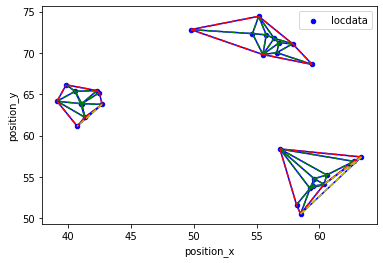

In [24]:
fig, ax = plt.subplots(nrows=1, ncols=1)

for simp in ac_simplices_all:
    ax.plot(locdata.coordinates[simp, 0], locdata.coordinates[simp, 1], '-b')
for simp in ac_simplices_interior:
    ax.plot(locdata.coordinates[simp, 0], locdata.coordinates[simp, 1], '--g')
for simp in ac_simplices_regular:
    ax.plot(locdata.coordinates[simp, 0], locdata.coordinates[simp, 1], '--r')
for simp in ac_simplices_singular:
    ax.plot(locdata.coordinates[simp, 0], locdata.coordinates[simp, 1], '--y')

locdata.data.plot.scatter(x='position_x', y='position_y', ax=ax, color='Blue', label='locdata')
plt.show()

Often the *regular* representation is good enough.

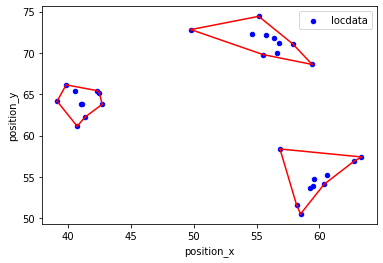

In [25]:
fig, ax = plt.subplots(nrows=1, ncols=1)
for simp in ac_simplices_regular:
    ax.plot(locdata.coordinates[simp, 0], locdata.coordinates[simp, 1], '-r')
locdata.data.plot.scatter(x='position_x', y='position_y', ax=ax, color='Blue', label='locdata')
plt.show()

You can get the connected components as `RoiRegion`.

In [26]:
H.connected_components

[{'region_type': 'shapelyPolygon', 'region_specs': [[[58.50076611190416, 50.52672536324184], [58.1792316770302, 51.648282425331736], [56.86379722591436, 58.38986909015327], [63.3418960358813, 57.42703583949026], [58.50076611190416, 50.52672536324184]], []]},
 {'region_type': 'shapelyPolygon', 'region_specs': [[[42.72033221839798, 63.78584943424909], [40.73918736980156, 61.13684610200226], [39.13768423877457, 64.16393074623767], [39.859889213790616, 66.14439201832943], [42.30911547721316, 65.44607504772645], [42.49851437865681, 65.19435510214517], [42.72033221839798, 63.78584943424909]], []]},
 {'region_type': 'shapelyPolygon', 'region_specs': [[[59.42085964070769, 68.61020528804443], [55.507485796034274, 69.8107451586385], [49.775370761064316, 72.82617382812268], [55.16943753505423, 74.4274836511679], [57.869508539047686, 71.10862010971034], [59.42085964070769, 68.61020528804443]], []]}]

In [27]:
connected_component_0 = H.connected_components[0]

print('dimension: ', connected_component_0.dimension)
print('region_measure: ', connected_component_0.region_measure)
print('subregion_measure: ', connected_component_0.subregion_measure)

dimension:  2
region_measure:  25.02720570311703
subregion_measure:  23.013885439080667
